<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Gr%C3%A1fico_Da_x_z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tentando fazer um ajuste com alguns dados de z e $d_A$ de https://arxiv.org/pdf/2002.09293.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sm
import scipy as sp
import math
import pandas as pd

In [2]:
# criando uma tabela com os dados
table = pd.DataFrame()

In [3]:
# pares ordenados do gráfico em que x1 = z, y1 = dA, y2 = theta_BAO e y2err = erro de theta_BAO 
x1 = np.array([0.11, 0.235, 0.365, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 2.225])
table['z'] = x1
y1 = np.array([6.715, 13.191, 17.081, 21.339, 20.000, 19.850, 20.321, 22.486, 22.405, 20.481, 21.144, 23.811, 23.217, 25.197, 25.856])
table['dA'] = y1
y2 = np.array([19.8, 9.06, 6.33, 4.77, 5.02, 4.99, 4.81, 4.29, 4.25, 4.59, 4.39, 3.85, 3.90, 3.55, 1.77]) 
table['thetaBAO'] = y2
y2err = np.array([3.26, 0.23, 0.22, 0.17, 0.25, 0.21, 0.17, 0.30, 0.25, 0.36, 0.33, 0.31, 0.43, 0.16, 0.31])
table['thetaBAOerr'] = y2err

In [4]:
# criando uma tabela com os dados de x1, y1, y2 e y2err no drive
#table.to_csv('/content/drive/MyDrive/Doutorado/dados.csv')
#table

In [5]:
# extranindo os dados do drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# tabela com os dados
dados = pd.read_csv('/content/drive/MyDrive/Doutorado/dados.csv', sep=',') #chamando a partir do drive
dados

,Unnamed: 0,z,dA,thetaBAO,thetaBAOerr
0,0,0.110,6.715,19.80,3.26
1,1,0.235,13.191,9.06,0.23
2,2,0.365,17.081,6.33,0.22
3,3,0.450,21.339,4.77,0.17
4,4,0.470,20.000,5.02,0.25
5,5,0.490,19.850,4.99,0.21
6,6,0.510,20.321,4.81,0.17
7,7,0.530,22.486,4.29,0.30
8,8,0.550,22.405,4.25,0.25
9,9,0.570,20.481,4.59,0.36


In [7]:
# nomeando os dados/colunas
z = dados['z']
dA = dados['dA']
thetaBAO = dados['thetaBAO']
thetaBAOerr = dados['thetaBAOerr']

In [8]:
#cálculo da linha de ajuste
slope, intercept = np.polyfit (x1, y1, 1) #1 indica a escala do gráfico

Gráfico de $d_A(z)$ x $z$. Ccalculei a mão os dados de $d_A$ usando a seguinte fórmula:

$d_A = \frac{r_{drag}}{(1+z)\theta_{BAO}}$, em que assumi $r_{drag}$ = 147,59

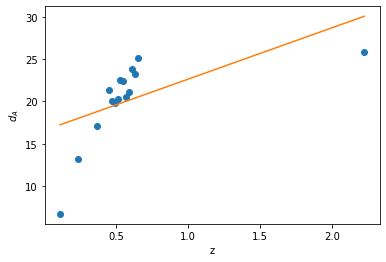

In [9]:
# AJUSTE ERRADO
plt.plot(z, dA, 'o')
plt.plot(z, slope*x1 + intercept) #linha de ajuste é f(x) = slope*x + intercept. 
plt.xlabel('z') #rotula o eixo x
plt.ylabel('$d_A$') #rotula o eixo y
plt.show()

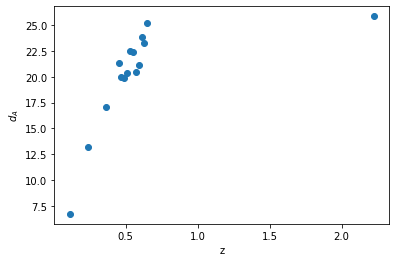

In [10]:
# fazendo só o plot, sem a curva de ajuste
plt.plot(x1, y1, 'o')
plt.xlabel('z') #rotula o eixo x
plt.ylabel('$d_A$') #rotula o eixo y
plt.show()

Gráfico de $\theta_{BAO}$ x $z$ usando os dados do artigo.

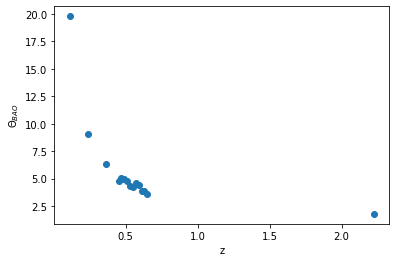

In [11]:
plt.plot(z, thetaBAO, 'o')
plt.xlabel('z') #rotula o eixo x
plt.ylabel('$\Theta_{BAO}$') #rotula o eixo y
plt.show()

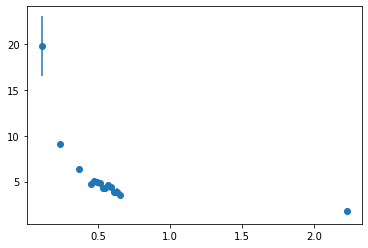

In [12]:
# tentativa de plotar os dados de theta_BAO com os erros
plt.errorbar(z, thetaBAO, thetaBAOerr, fmt='o')
plt.show()

In [13]:
# redefinindo theta_BAO
theta = np.deg2rad(thetaBAO)
theta_err = np.deg2rad(thetaBAOerr)

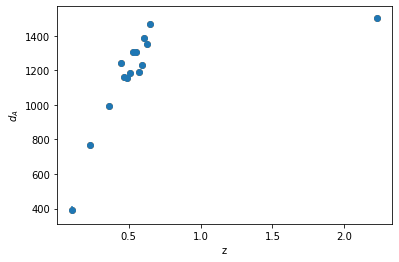

In [14]:
# definindo a distância de diâmetro angular em função de z e thetaBAO
rs = 150.0
DA = rs/((1+z)*theta)  

# definindo algumas funções para facilitar
t1 = rs/(1+z)
t2 = theta_err/theta


# erro da distância de diâmetro angular
DA_err = np.sqrt((t1**2)*(t2**2))  

# plotando novamente dA cx z
plt.errorbar(z, DA, DA_err, fmt='o')
plt.xlabel('z')
plt.ylabel('$d_A$')
plt.plot(z, DA, 'o')
plt.show()

#print(dA_err)

Uma forma de obter a curva de ajuste para os dados da distância de diâmetro angular é usando a biblioteca pyccl do Python. Porém, esta biblioteca precisa ser instalada no Colab através do comando abaixo.

In [15]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

conda-forge/linux-64                                        Usin

In [16]:
import pyccl as ccl

In [17]:
#cosmological model
# Planck cosmological parameters
#cosmo = ccl.Cosmology(
#    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649)

def mu_fit(z, Omc, h, w0):  #mu_fit é somente o nome da função, é arbitrário
    
    cosmo = ccl.Cosmology(
        Omega_c=Omc, Omega_b=0.0494, h=h, sigma8=0.8120, n_s=0.9649, w0=w0) #parâmetros comológicos
    
    a = 1. / (1. + z) #fator de escala
    
    return ccl.angular_diameter_distance(cosmo, a)  # distância de diâmetro angular

[ 0.40807371  0.72742165 -1.69587549]
[0.14248192 0.136627   2.29225462]


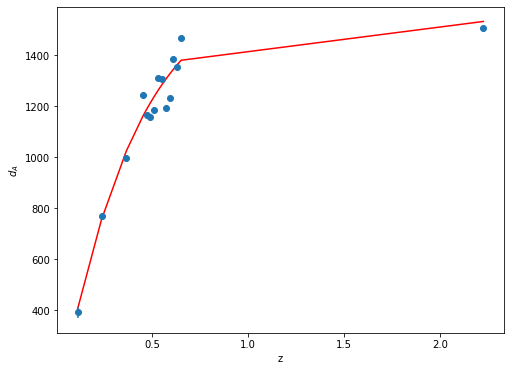

In [18]:
# best-fit

popt, pcov = curve_fit(mu_fit, z, DA, sigma=DA_err, p0=[0.27, 0.67, -1],  #não entendi o que é  popt, pcov, p0 e bounds
                      bounds=(-2, [2, 2, 2]), method='trf')


#não sei o que são
print(popt)
print(np.sqrt(np.diag(pcov)))


# plotando dA x z
plt.figure(figsize=(8, 6))
plt.plot(z, mu_fit(z, *popt), color='red')
plt.errorbar(z, DA, DA_err, fmt='o')
plt.xlabel('z')
plt.ylabel('$d_A$')
plt.show()

Agora, vamos plotar outro observável cosmológico, que é a distância de luminosidade. Vamos graficar $d_L(z)$ x $z$ usando a função exata deste observável, dada por:

$d_L = (1+z) \int_0^z \frac{dz}{\sqrt([\Omega_m (1+z)^3 + 1 - \Omega_m])}$.

In [19]:
# código do Bruno Wesley

# símbolos:
Z = sm.symbols('Z', real=True)
O_m0 = 0.3
#O_m0 = sm.symbols('O_m0', real=True)  #se não quisermos definir um valor para O_m0, escrevemos isso

# integrando
f = 1/sm.sqrt(O_m0*(1+Z)**3 + 1-O_m0) #no denominador é o H(z)

# primitiva:
sm.integrate(f, Z)

0.398409536444798*(Z + 1)*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 0.428571428571429*(Z + 1)**3*exp_polar(I*pi))/gamma(4/3)

In [20]:
# algumas definições:
gamma = math.gamma
#polar = sm.polar_lift # necessário se não tivéssemos previamente definido um valor para O_m0
hyper = sp.special.hyp2f1

In [21]:
# intervalo:
Z = np.linspace(0, 2, 1000)

In [22]:
# solução I
If = (0.398409536444798*(Z+1)*gamma(1/3)*hyper(1/3, 1/2, 4/3, -0.428571428571429*(Z+1)**3))/gamma(4/3)
I0 = (0.398409536444798 * 1 * gamma(1/3)*hyper(1/3, 1/2, 4/3, -0.428571428571429  *  1**3))/gamma(4/3)

I = If - I0

# distância de luminosidade:
dL = (1+Z)*I

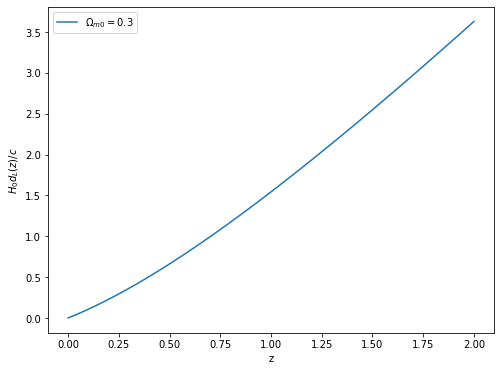

In [23]:
# plotando a distância de luminosidade:
plt.figure(figsize=(8, 6))
plt.plot(Z, dL, label='$\Omega_{m0}=0.3$')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('$H_0 d_L(z)/c$')
plt.show()

Agora, vamos plotar $d_A(z)$ x $z$ a partir da função exata deste observável, dada por:

$d_A = \frac{d_L}{(1+z)^2}$.

In [24]:
# constantes
c = 2.9*10**5 # velocidade da luz
h0 = 70 #km/s/Mpc

In [25]:
# distância de diâmetro angular
da = (c/h0)*((1+Z)**(-1))*I

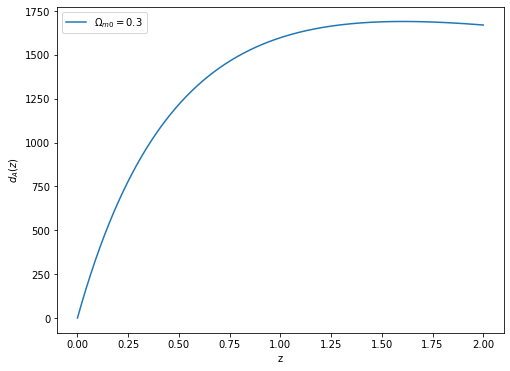

In [26]:
# plotando a distância de diâmetro angular:
plt.figure(figsize=(8, 6))
plt.plot(Z, da, label='$\Omega_{m0}=0.3$')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('$d_A(z)$')
plt.show()

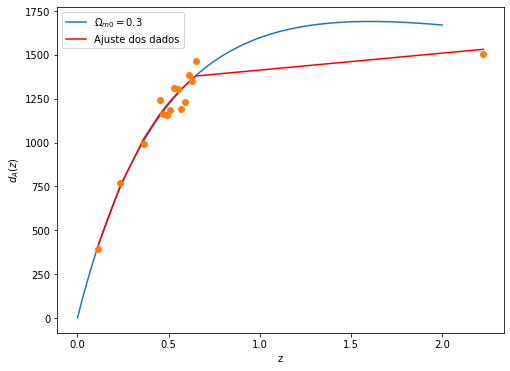

In [27]:
# plotando a função exata e comparando com o obtido através dos dados

plt.figure(figsize=(8, 6))
plt.plot(Z, da, label='$\Omega_{m0}=0.3$')
plt.plot(z, mu_fit(z, *popt), color='red', label='Ajuste dos dados')
#plt.plot(z, DA, 'o')
plt.errorbar(z, DA, DA_err, fmt='o')  
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('$d_A(z)$')
plt.show()